In [45]:
import pandas as pd
import missingno as msno # biblioteca muito boa para plots de missing
import matplotlib.pyplot as plt

pd.options.display.max_columns = 999

In [201]:
df = pd.read_csv('./data/Covid-19-World-Dataset.csv')

In [202]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2/24/2020,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2/25/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2/26/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2/27/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2/28/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


## `Missing Analysis`

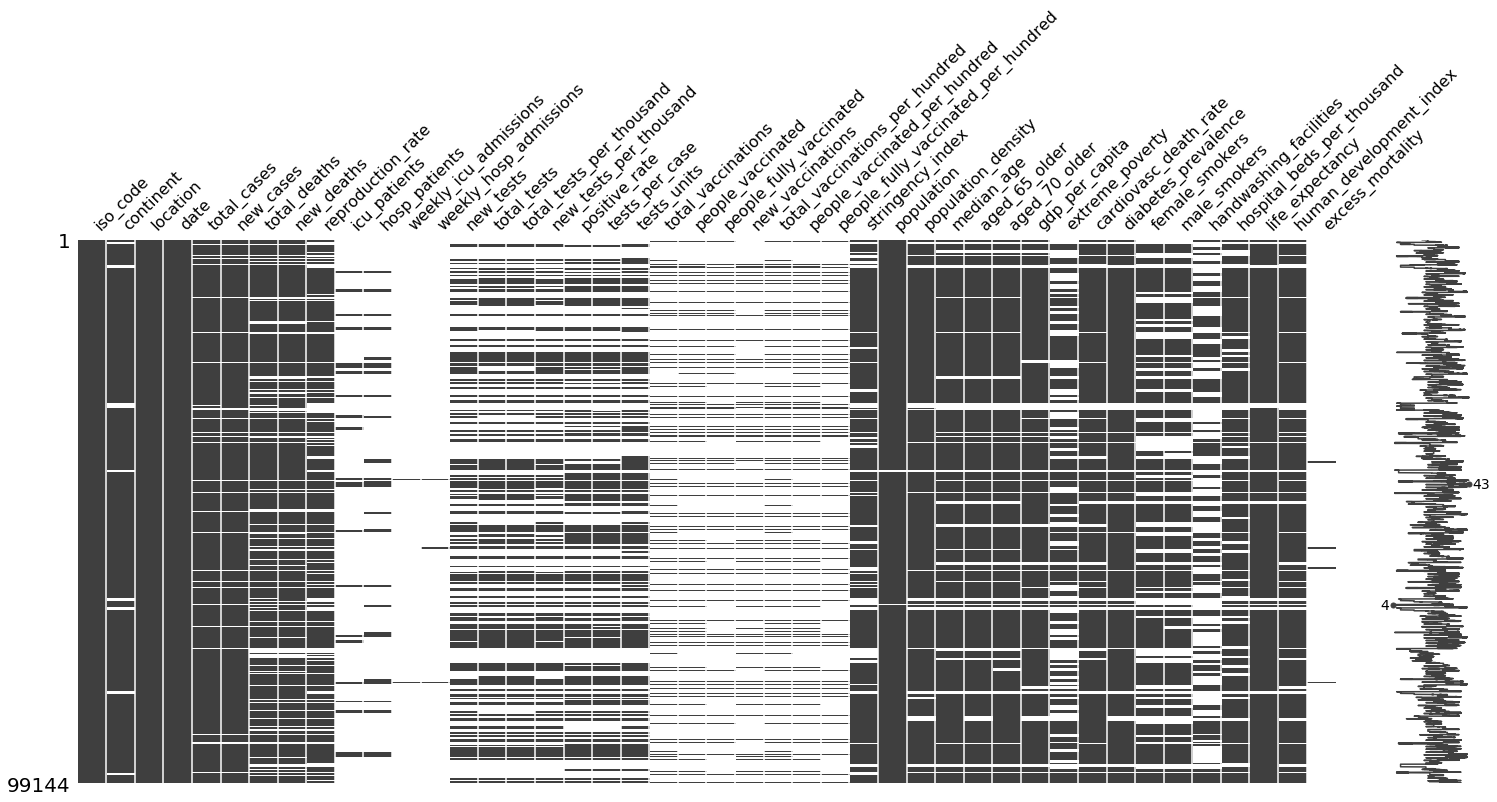

In [203]:
msno.matrix(df)
plt.show()

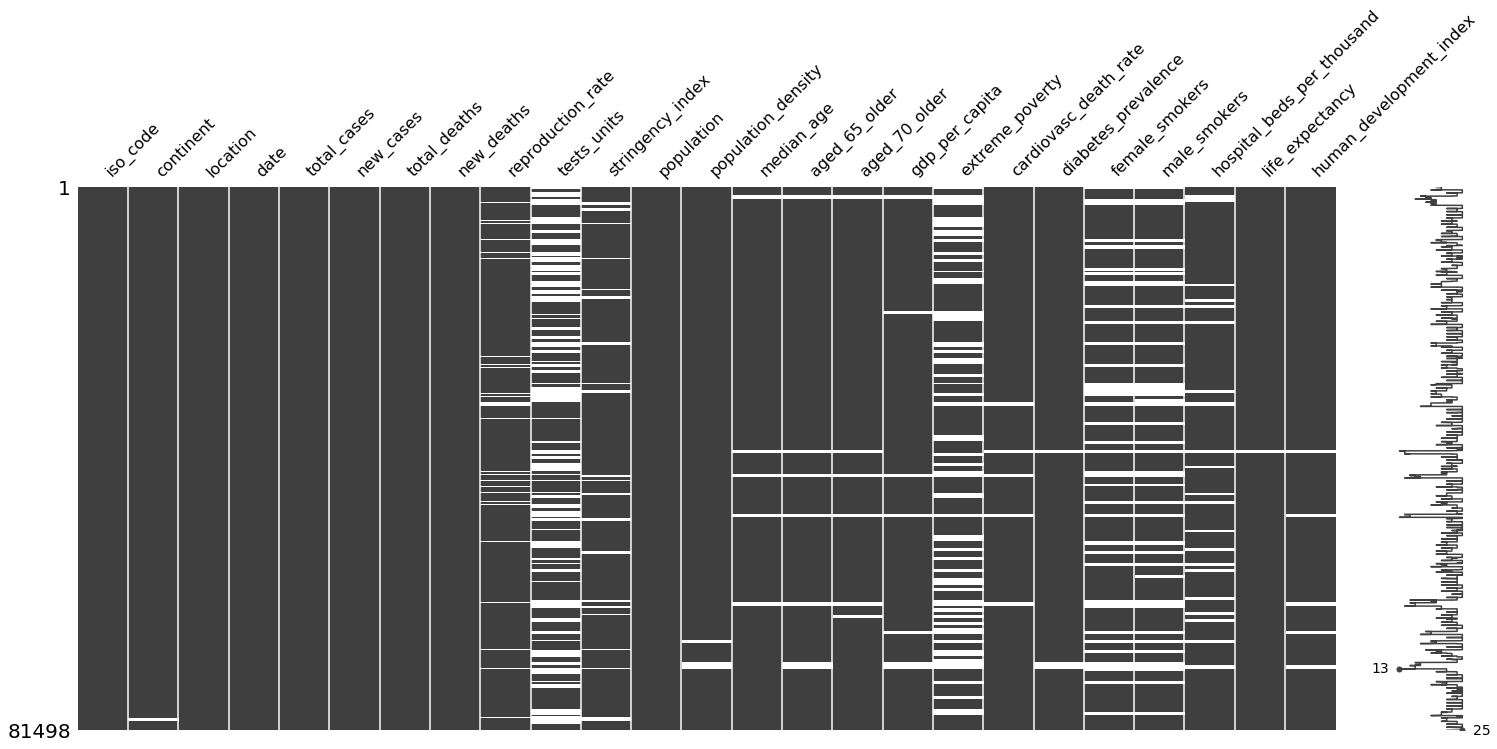

In [204]:
# dropping columns with more than 50% of the rows missing
df = df.iloc[:, (df.isnull().sum(0)/df.shape[0] < .5).values]

# dropping rows with more than 50% of the columns missing
df = df[df.isnull().sum(1)/df.shape[1] < .5]

df = df[~df.total_deaths.isnull()]

msno.matrix(df)
plt.show()

In [205]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
27,AFG,Asia,Afghanistan,3/22/2020,34.0,4.0,1.0,1.0,NaN,NaN,41.67,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
28,AFG,Asia,Afghanistan,3/23/2020,41.0,7.0,1.0,0.0,NaN,NaN,41.67,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
29,AFG,Asia,Afghanistan,3/24/2020,43.0,2.0,1.0,0.0,NaN,NaN,50.93,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
30,AFG,Asia,Afghanistan,3/25/2020,76.0,33.0,2.0,1.0,NaN,NaN,59.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
31,AFG,Asia,Afghanistan,3/26/2020,80.0,4.0,3.0,1.0,NaN,NaN,59.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511


In [185]:
df.nunique()[df.dtypes == object]

iso_code       186
continent        6
location       186
date           525
tests_units      4
dtype: int64

In [186]:
df.dtypes[df.dtypes != object]

total_cases                   float64
new_cases                     float64
total_deaths                  float64
new_deaths                    float64
reproduction_rate             float64
stringency_index              float64
population                    float64
population_density            float64
median_age                    float64
aged_65_older                 float64
aged_70_older                 float64
gdp_per_capita                float64
extreme_poverty               float64
cardiovasc_death_rate         float64
diabetes_prevalence           float64
female_smokers                float64
male_smokers                  float64
hospital_beds_per_thousand    float64
life_expectancy               float64
human_development_index       float64
dtype: object

In [206]:
cat = ['continent', 'tests_units']
num = ['reproduction_rate', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index']
# cat_cat = ['continent', 'tests_units']

In [188]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [207]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 16.17 MB
Memory usage after optimization is: 5.17 MB
Decreased by 68.0%


In [190]:
import numpy as np
from xgboost import XGBRegressor, XGBClassifier
import shap
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.inspection import permutation_importance

import sklearn
sklearn.set_config(display="diagram")

In [191]:
class Pass(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]
    
    def get_feature_names(self):
        return self.columns
    
class Dummies(BaseEstimator, TransformerMixin):
    def __init__(self, columns, **kwargs):
        self.columns = columns
        self.onehot = OneHotEncoder(**kwargs)
    
    def fit(self, X, y=None):
        self.onehot.fit(X[self.columns])
        return self
    
    def transform(self, X):
        return self.onehot.transform(X[self.columns]).toarray()
    
    def get_feature_names(self):
        return self.onehot.get_feature_names(self.columns)

In [221]:
aux = df.groupby(cat[0]).agg({num[0]: ['sum', 'mean', 'median', 'std']})
aux.columns = ['sum', 'mean', 'median', 'std']

In [254]:
class CategoricalNumerical(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns, operations=['sum', 'mean', 'median', 'std']):
        self.columns = columns
        self.operations = operations
        self.transforms = {}
        self.names = []

    def fit(self, X, y=None):
        for cat, num in self.columns:
            aux = X.groupby(cat).agg({num: self.operations})
            aux.columns = self.operations
            aux = aux.reset_index()
            self.transforms[cat+num] = aux
            self.names.extend(['%s_%s_%s' % (num, cat, op) for op in self.operations])
        return self

    def transform(self, X):
        first = True
        for cat, num in self.columns:
            aux = X[[cat, num]].copy()
            aux = aux.merge(self.transforms[cat+num], on=cat, how='left')
            for op in self.operations:
                name = '%s_%s_%s' % (num, cat, op)
                aux[name] = aux[num] / aux[op]
            aux = aux.iloc[:, -1*len(self.operations):].fillna(0)
            if(first):
                first = False
                final = aux
            else:
                final = pd.concat([final, aux], axis=1)
            return final.values

    def get_feature_names(self):
        return self.names

In [276]:
cat1, cat2 = 'location', 'tests_units'
aux = df.groupby(cat1)[cat2].apply(lambda x: ' '.join(str(_) for _ in x)).reset_index()
vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(aux[cat2])

In [290]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

class CategoricalCategorical(BaseEstimator, TransformerMixin):
    def __init__(self, columns, random_state=None):
        self.random_state = random_state
        self.columns = columns
        self.names = []
        self.transforms = {}
        
    def fit(self, X, y=None):
        for cat1, cat2 in self.columns:
            aux = X.groupby(cat1)[cat2].apply(lambda x: ' '.join(str(_) for _ in x)).reset_index()
            vectorizer = CountVectorizer()
            vector = vectorizer.fit_transform(aux[cat2])
            if(vector.shape[0] > 5):
                vector = LatentDirichletAllocation(n_components=5,
                                                   random_state=self.random_state).fit_transform(vector)
            else:
                vector = vector.toarray()
            names = ['%s_%s_%d' % (cat1, cat2, i) for i in range(vector.shape[1])]
            self.names.extend(names)
            aux[names] = pd.DataFrame(vector, index=aux.index)
            aux = aux.drop(cat2, axis=1)
            self.transforms[cat1+cat2] = aux
        return self
           
    def transform(self, X):
        first = True
        for cat1, cat2 in self.columns:
            aux = X[[cat1]].copy().merge(self.transforms[cat1+cat2], on=cat1, how='left')
            aux = aux.drop(cat1, axis=1)
            if(first):
                first = False
                final = aux
            else:
                final = pd.concat([final, aux], axis=1)
            return final.values

    def get_feature_names(self):
        return self.names

In [293]:
preprocessing = FeatureUnion([
    ('cat', Dummies(cat, handle_unknown="ignore")),
    ('num', Pass(num)),
    ('catnum', CategoricalNumerical([('continent', 'population')])),
    ('catcat', CategoricalCategorical([('location', 'tests_units')]))
])

transformations = Pipeline([
    ('preprocessing', preprocessing),
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(missing_values=np.nan, strategy='mean'))#KNNImputer(n_neighbors=5))
])

pipe = Pipeline(steps=[
    ('transformations', transformations),
    ('model', XGBRegressor())
])


In [294]:
pipe.fit(df, df['total_deaths'])

[23:13:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('transformations',
                 Pipeline(steps=[('preprocessing',
                                  FeatureUnion(transformer_list=[('cat',
                                                                  Dummies(columns=['continent',
                                                                                   'tests_units'])),
                                                                 ('num',
                                                                  Pass(columns=['reproduction_rate',
                                                                                'stringency_index',
                                                                                'population',
                                                                                'population_density',
                                                                                'median_age',
                                                                                'aged_65_older',
                                                                                'aged_70_older',
                                                                                'gdp_per_capita',
                                                                                'extreme_poverty',
                                                                                'cardiovasc_death_rate',
                                                                                'diabetes_prevalence',
                                                                                'female_smokers',
                                                                                'male_smokers',
                                                                                'hospital_beds_per_thousand',
                                                                                'life_expectancy',
                                                                                'human_development_index'])),
                                                                 ('catnum',
                                                                  CategoricalNumerical(columns=[('continent',
                                                                                                 'population')])),
                                                                 ('catcat',
                                                                  CategoricalCategorical(columns=[('location',
                                                                                                   'tests_units')]))])),
                                 ('scaler', StandardScaler()),
                                 ('impute', SimpleImputer())])),
                ('model', XGBRegressor())])

In [343]:
pd.DataFrame(pipe['transformations'].transform(df),
             columns=pipe['transformations']['preprocessing'].get_feature_names()).head()

,cat__continent_Africa,cat__continent_Asia,cat__continent_Europe,cat__continent_North America,cat__continent_Oceania,cat__continent_South America,cat__continent_nan,cat__tests_units_people tested,cat__tests_units_samples tested,cat__tests_units_tests performed,cat__tests_units_units unclear,cat__tests_units_nan,num__reproduction_rate,num__stringency_index,num__population,num__population_density,num__median_age,num__aged_65_older,num__aged_70_older,num__gdp_per_capita,num__extreme_poverty,num__cardiovasc_death_rate,num__diabetes_prevalence,num__female_smokers,num__male_smokers,num__hospital_beds_per_thousand,num__life_expectancy,num__human_development_index,catnum__population_continent_sum,catnum__population_continent_mean,catnum__population_continent_median,catnum__population_continent_std,catcat__location_tests_units_0,catcat__location_tests_units_1,catcat__location_tests_units_2,catcat__location_tests_units_3,catcat__location_tests_units_4
0,-0.635705,1.746135,-0.592267,-0.350949,-0.145255,-0.271735,-0.080521,-0.364198,-0.340069,-0.803964,-0.107439,1.290378,1.703103e-17,-0.951724,-0.088641,-0.183831,-1.316649,-1.010166,-1.008317,-0.89015,4.216527e-15,2.893004,0.515393,3.312959e-15,-9.411461e-15,-1.020096,-1.082031,-1.438289,-0.304723,-0.322611,-0.167866,-0.429497,-0.354611,1.453671,-0.114485,-0.864576,-0.378983
1,-0.635705,1.746135,-0.592267,-0.350949,-0.145255,-0.271735,-0.080521,-0.364198,-0.340069,-0.803964,-0.107439,1.290378,1.703103e-17,-0.951724,-0.088641,-0.183831,-1.316649,-1.010166,-1.008317,-0.89015,4.216527e-15,2.893004,0.515393,3.312959e-15,-9.411461e-15,-1.020096,-1.082031,-1.438289,-0.304723,-0.322611,-0.167866,-0.429497,-0.354611,1.453671,-0.114485,-0.864576,-0.378983
2,-0.635705,1.746135,-0.592267,-0.350949,-0.145255,-0.271735,-0.080521,-0.364198,-0.340069,-0.803964,-0.107439,1.290378,1.703103e-17,-0.472703,-0.088641,-0.183831,-1.316649,-1.010166,-1.008317,-0.89015,4.216527e-15,2.893004,0.515393,3.312959e-15,-9.411461e-15,-1.020096,-1.082031,-1.438289,-0.304723,-0.322611,-0.167866,-0.429497,-0.354611,1.453671,-0.114485,-0.864576,-0.378983
3,-0.635705,1.746135,-0.592267,-0.350949,-0.145255,-0.271735,-0.080521,-0.364198,-0.340069,-0.803964,-0.107439,1.290378,1.703103e-17,-0.043680,-0.088641,-0.183831,-1.316649,-1.010166,-1.008317,-0.89015,4.216527e-15,2.893004,0.515393,3.312959e-15,-9.411461e-15,-1.020096,-1.082031,-1.438289,-0.304723,-0.322611,-0.167866,-0.429497,-0.354611,1.453671,-0.114485,-0.864576,-0.378983
4,-0.635705,1.746135,-0.592267,-0.350949,-0.145255,-0.271735,-0.080521,-0.364198,-0.340069,-0.803964,-0.107439,1.290378,1.703103e-17,-0.043680,-0.088641,-0.183831,-1.316649,-1.010166,-1.008317,-0.89015,4.216527e-15,2.893004,0.515393,3.312959e-15,-9.411461e-15,-1.020096,-1.082031,-1.438289,-0.304723,-0.322611,-0.167866,-0.429497,-0.354611,1.453671,-0.114485,-0.864576,-0.378983


In [214]:
# explainer = shap.Explainer(pipe['model'])
# shap_values = explainer(pd.DataFrame(pipe['transformations'].transform(df),
#                                      columns=pipe['transformations']['preprocessing'].get_feature_names()))
# shap.plots.bar(shap_values)

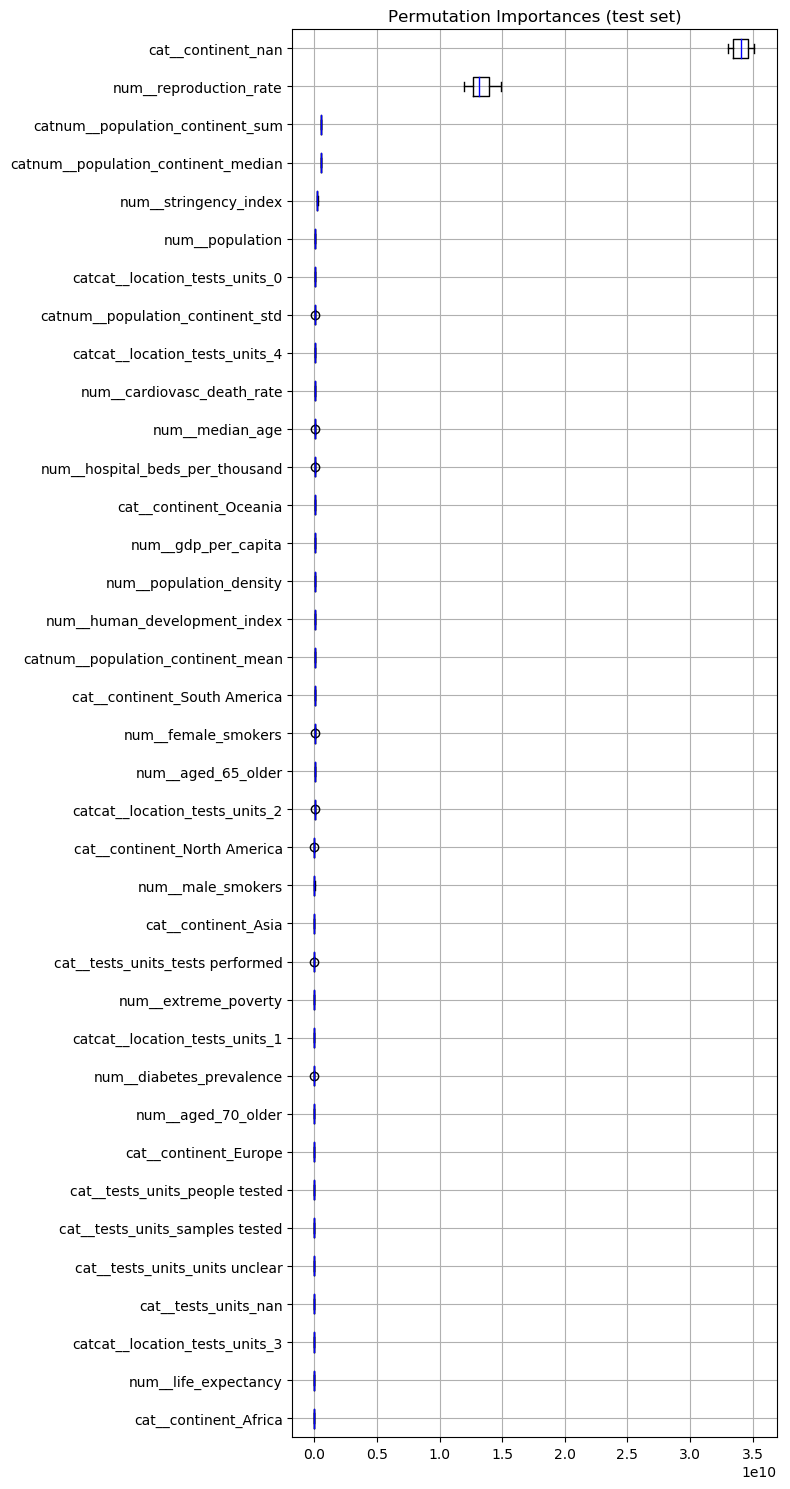

In [328]:
result = permutation_importance(pipe['model'], pipe['transformations'].transform(df),
                                df['total_deaths'], scoring='neg_mean_squared_error',
                                n_repeats=10, random_state=42, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()


# PLOT
fig, ax = plt.subplots(figsize=(8, 15), dpi=100)
ax.boxplot(result.importances[sorted_idx].T, vert=False,
           labels=np.array(pipe['transformations']['preprocessing'].get_feature_names())[sorted_idx],
#            boxprops=dict(color=c),
#             capprops=dict(color=c),
#             whiskerprops=dict(color=c),
#             flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'),)
ax.set_title("Permutation Importances (test set)")
plt.grid()
fig.tight_layout()
plt.show()

In [338]:
result_df = pd.DataFrame({'importances_mean': result['importances_mean'],
                          'importances_std': result['importances_std']},
                         index=pipe['transformations']['preprocessing'].get_feature_names()) \
    .sort_values('importances_mean', ascending=False)

result_df.head()

,importances_mean,importances_std
cat__continent_nan,3.405541e+10,6.862792e+08
num__reproduction_rate,1.327622e+10,8.694741e+08
catnum__population_continent_sum,5.513342e+08,4.690778e+06
catnum__population_continent_median,5.190922e+08,5.226850e+06
num__stringency_index,2.341580e+08,8.124838e+06


In [342]:
result_df.shape[0], result_df[~(result_df.importances_mean + result_df.importances_std < 0.1*1e9)].shape[0]

(37, 5)

In [ ]:
# Draw the heatmap with the mask and correct aspect ratio
fig = plt.figure(figsize=(10,10))
sns.heatmap(df[variaveis].corr(), cmap='Blues', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [ ]:
# função de learning rate decay
def learning_rate_decay(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

# parametros iniciais e imutáveis
fit_params={
    'callbacks'   : [lgb.reset_parameter(learning_rate=learning_rate_decay)],
    'verbose'     : 100
}

# parametros a otimizar
params ={
    'bossting_type'    : ['gbdt', 'dart'],
    'num_leaves'       : randint(30, 50), 
    'max_depth'        : randint(5,15),
    'min_child_samples': randint(5, 20), 
    'subsample'        : uniform(loc=0.2, scale=0.8), 
    'colsample_bytree' : uniform(loc=0.4, scale=0.6),
    'reg_alpha'        : [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda'       : [0, 1e-1, 1, 5, 10, 20, 50, 100]
}

In [ ]:
model = lgb.LGBMRegressor(n_estimators=1000, objective='regression', random_state=44)
clf = RandomizedSearchCV(model, params,
                         n_iter=100, scoring='neg_root_mean_squared_error', verbose=True,
                         cv=cv, n_jobs=-1, random_state=44)
clf.fit(X_train[cols], y_train, **fit_params)

print('Best score reached: {} with params:\n{} '.format(clf.best_score_, clf.best_params_))

In [ ]:
model = lgb.LGBMRegressor(n_estimators=5000, objective='regression', random_state=44, **clf.best_params_) \
    .fit(X_train[cols], y_train, **fit_params)

rmse_final = np.sqrt(mean_squared_error(y_test, model.predict(X_test[cols])))

print('RMSE Modelo final: %.04f' % rmse_final)